### 1 Import libraries

In [1]:
import pandas as pd 
import random
import numpy as np 
import seaborn as sns
from pandas_datareader import data as pdr
from matplotlib import pyplot as plt

### 2 Import data

In [2]:
global_cases = pd.read_csv("C:/Users/lenovo/Desktop/Fares/SDA/Time series/data/CONVENIENT_global_confirmed_cases.csv",sep=',')
global_deaths = pd.read_csv("C:/Users/lenovo/Desktop/Fares/SDA/Time series/data/CONVENIENT_global_deaths.csv",sep=',')

In [3]:
global_cases

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,6/18/21,2203.0,3.0,379.0,3.0,178.0,0.0,20363.0,86.0,0.0,...,10270.0,2716.0,385.0,0.0,1278.0,358.0,165.0,6.0,2913.0,408.0
514,6/19/21,0.0,4.0,367.0,0.0,137.0,0.0,15631.0,81.0,0.0,...,10075.0,1999.0,391.0,0.0,1273.0,470.0,106.0,2.0,1816.0,293.0
515,6/20/21,0.0,2.0,235.0,0.0,74.0,0.0,10395.0,60.0,0.0,...,9072.0,1488.0,415.0,0.0,1327.0,280.0,68.0,8.0,2060.0,151.0
516,6/21/21,5168.0,0.0,473.0,22.0,70.0,0.0,8606.0,26.0,0.0,...,10467.0,1517.0,427.0,0.0,1298.0,272.0,138.0,4.0,1598.0,416.0


In [4]:
global_cases=global_cases.dropna()
global_cases

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,6/18/21,2203.0,3.0,379.0,3.0,178.0,0.0,20363.0,86.0,0.0,...,10270.0,2716.0,385.0,0.0,1278.0,358.0,165.0,6.0,2913.0,408.0
514,6/19/21,0.0,4.0,367.0,0.0,137.0,0.0,15631.0,81.0,0.0,...,10075.0,1999.0,391.0,0.0,1273.0,470.0,106.0,2.0,1816.0,293.0
515,6/20/21,0.0,2.0,235.0,0.0,74.0,0.0,10395.0,60.0,0.0,...,9072.0,1488.0,415.0,0.0,1327.0,280.0,68.0,8.0,2060.0,151.0
516,6/21/21,5168.0,0.0,473.0,22.0,70.0,0.0,8606.0,26.0,0.0,...,10467.0,1517.0,427.0,0.0,1298.0,272.0,138.0,4.0,1598.0,416.0


In [5]:
global_cases = global_cases.rename(columns={'Country/Region' : 'Date'})
global_cases

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,6/18/21,2203.0,3.0,379.0,3.0,178.0,0.0,20363.0,86.0,0.0,...,10270.0,2716.0,385.0,0.0,1278.0,358.0,165.0,6.0,2913.0,408.0
514,6/19/21,0.0,4.0,367.0,0.0,137.0,0.0,15631.0,81.0,0.0,...,10075.0,1999.0,391.0,0.0,1273.0,470.0,106.0,2.0,1816.0,293.0
515,6/20/21,0.0,2.0,235.0,0.0,74.0,0.0,10395.0,60.0,0.0,...,9072.0,1488.0,415.0,0.0,1327.0,280.0,68.0,8.0,2060.0,151.0
516,6/21/21,5168.0,0.0,473.0,22.0,70.0,0.0,8606.0,26.0,0.0,...,10467.0,1517.0,427.0,0.0,1298.0,272.0,138.0,4.0,1598.0,416.0


In [6]:
global_cases['Date'] = pd.to_datetime(global_cases['Date'])

In [7]:
global_cases = global_cases.set_index('Date')
global_cases

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia.1,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18,2203.0,3.0,379.0,3.0,178.0,0.0,20363.0,86.0,0.0,6.0,...,10270.0,2716.0,385.0,0.0,1278.0,358.0,165.0,6.0,2913.0,408.0
2021-06-19,0.0,4.0,367.0,0.0,137.0,0.0,15631.0,81.0,0.0,5.0,...,10075.0,1999.0,391.0,0.0,1273.0,470.0,106.0,2.0,1816.0,293.0
2021-06-20,0.0,2.0,235.0,0.0,74.0,0.0,10395.0,60.0,0.0,7.0,...,9072.0,1488.0,415.0,0.0,1327.0,280.0,68.0,8.0,2060.0,151.0


In [8]:
# Select randomly 5 countries

global_cases = global_cases.sample(n=5,axis=1,replace=False)
global_cases

,United Arab Emirates,Congo (Kinshasa),San Marino,Gabon,Dominica
Date,,,,,
2020-01-23,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-06-18,1942.0,379.0,0.0,0.0,0.0
2021-06-19,2109.0,562.0,0.0,32.0,0.0
2021-06-20,1850.0,290.0,0.0,0.0,0.0


-----

### 3. Data visualisation 

**2.1.stationnarity**

**First step is tolook at the graphs 

United Arab Emirates Line plot:


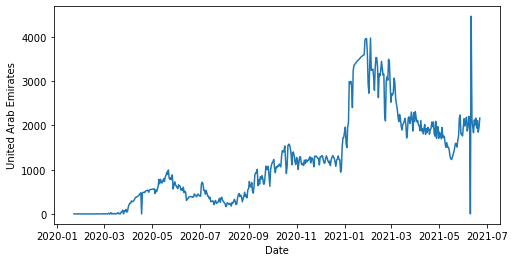

Congo (Kinshasa) Line plot:


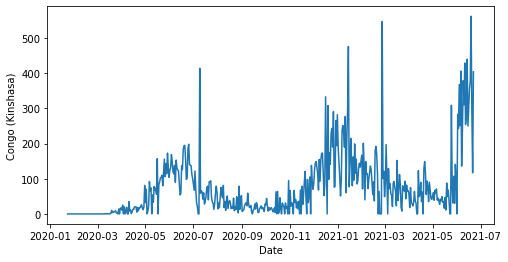

San Marino Line plot:


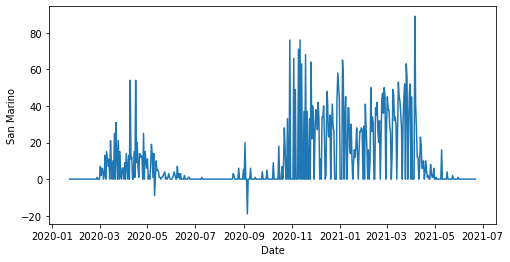

Gabon Line plot:


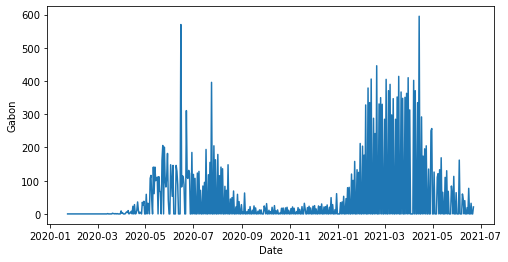

Dominica Line plot:


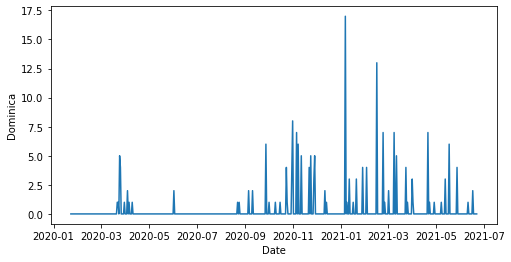

In [9]:
for i in global_cases:
    plt.figure(figsize = (8, 4))
    sns.lineplot(x=global_cases.index, y=global_cases[i], data=global_cases)
    print(f'{i} Line plot:')
    plt.show()

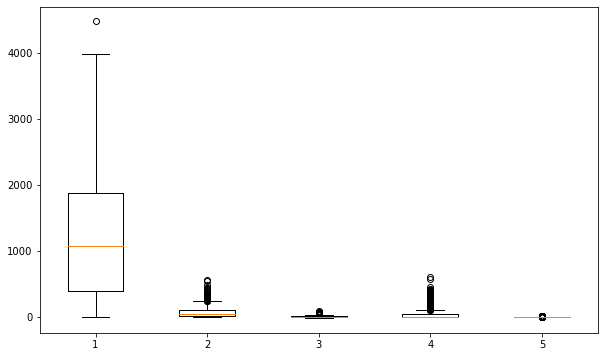

In [12]:
import matplotlib.pyplot as plt

# Create a boxplot with larger figure size
plt.figure(figsize=(10, 6))
plt.boxplot(global_cases)

# Show the plot
plt.show()


-----

**2.2. Second step to check stationarty

In [22]:
def split(global_cases): 
    X = global_cases.values
    split = round(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print(i)
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('var1=%f, var2=%f' % (var1, var2))
    if mean2>mean1 :
        print( 'We will need ADF')
    print('')

for i in global_cases.columns:
    split(global_cases[i])

United Arab Emirates
mean1=390.674419, mean2=1989.830116
var1=96457.266090, var2=639961.646815
We will need ADF

Congo (Kinshasa)
mean1=41.817829, mean2=106.335907
var1=2890.637357, var2=10668.400680
We will need ADF

San Marino
mean1=2.837209, mean2=16.826255
var1=50.423112, var2=416.004562
We will need ADF

Gabon
mean1=34.139535, mean2=62.073359
var1=4582.275104, var2=14106.832456
We will need ADF

Dominica
mean1=0.120155, mean2=0.617761
var1=0.377036, var2=3.757368
We will need ADF



*** 2.3. ADF Test 


**Test de Dickey-Fuller augmenté**



<br />**Hypotheis** :
<br />**H0** : Time series is not statioanry.
<br />**H1** : Time series is stationary.

In [23]:
from statsmodels.tsa.stattools import adfuller

for i in global_cases:
    adf = adfuller(global_cases[i])
    print(f'For {i} :')
    if adf[1] <= 0.05:
        print('P-value: ', adf[1])
        print('Reject null hypothesis, data is stationary')
        print('')
    else:
        print('P-value: ',adf[1])
        print('Fail to reject null hypothesis, data is not stationary')
        print('')

For United Arab Emirates :
P-value:  0.5467094920785018
Fail to reject null hypothesis, data is not stationary

For Congo (Kinshasa) :
P-value:  0.6307868178396064
Fail to reject null hypothesis, data is not stationary

For San Marino :
P-value:  0.48882256520705564
Fail to reject null hypothesis, data is not stationary

For Gabon :
P-value:  0.2236932862079929
Fail to reject null hypothesis, data is not stationary

For Dominica :
P-value:  0.0
Reject null hypothesis, data is stationary



**Observation** :As data in not stationary we will differentiate 

In [25]:
for j in ['United Arab Emirates', 'Congo (Kinshasa)', 'San Marino', 'Gabon']:
    if j in global_cases.columns:
        global_cases[j] = global_cases[j].diff()
        global_cases = global_cases.dropna()


In [26]:
 
for i in global_cases:
    adf = adfuller(global_cases[i])
    print(f'For {i} :')
    if adf[1] <= 0.05:
        print('P-value: ', adf[1])
        print('Reject null hypothesis, data is stationary')
        print('')
    else:
        print('P-value: ',adf[1])
        print('Fail to reject null hypothesis, data is not stationary')
        print('')

For United Arab Emirates :
P-value:  5.140537885695094e-11
Reject null hypothesis, data is stationary

For Congo (Kinshasa) :
P-value:  5.432531221860645e-17
Reject null hypothesis, data is stationary

For San Marino :
P-value:  1.5559384868611928e-20
Reject null hypothesis, data is stationary

For Gabon :
P-value:  1.437339471251509e-16
Reject null hypothesis, data is stationary

For Dominica :
P-value:  0.0
Reject null hypothesis, data is stationary



### 4. Normality

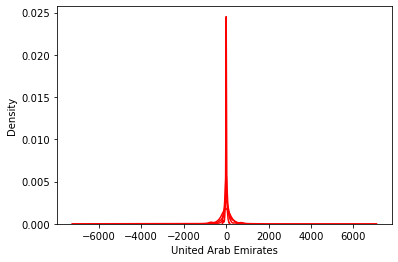

In [44]:
import seaborn as sns
columns = ['United Arab Emirates', 'Congo (Kinshasa)', 'San Marino', 'Gabon']
for col in columns :
    sns.kdeplot(global_cases[col], label=col, color='red')
    


**Histogramme**

La visualisation d'histogrammes permet d'identifier la possibilité qu'une variable suive ou non une loi-normale en comparant sa forme à celle d'une courbe de Gauss.

United Arab Emirates Histogram:


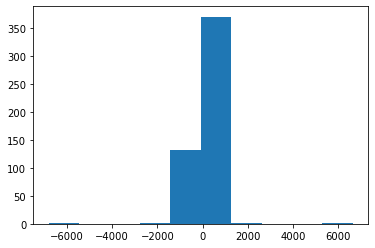

Congo (Kinshasa) Histogram:


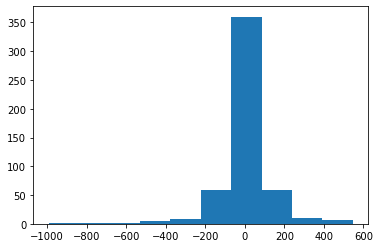

San Marino Histogram:


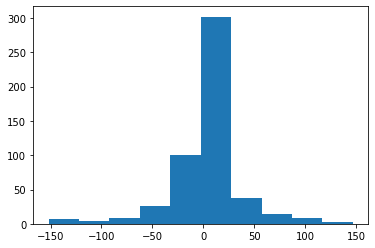

Gabon Histogram:


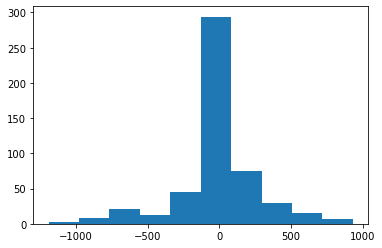

Dominica Histogram:


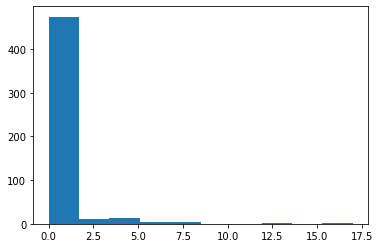

In [29]:
for i in global_cases:
    plt.hist(global_cases[i], bins=10)
    print(f'{i} Histogram:')
    plt.show()

**3.2. Normality test**

**Shapiro-Wilk Test**

This test evaluates if the sample was extracted out of a normal distribution 
This test suits best n<1000 cases

In [46]:
from numpy.random import seed
from scipy.stats import shapiro

seed(1)

for i in global_cases:
    stat, p = shapiro(global_cases[i])
    alpha = 0.05
    if p > alpha:
        print(i)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('p-value > 0.05, Sample looks Gaussian (fail to reject H0)')
        print('')
    else:
        print(i)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('p-value < 0.05, Sample does not look Gaussian (reject H0)')
        print('')

United Arab Emirates
Statistics=0.432, p=0.000
p-value < 0.05, Sample does not look Gaussian (reject H0)

Congo (Kinshasa)
Statistics=0.801, p=0.000
p-value < 0.05, Sample does not look Gaussian (reject H0)

San Marino
Statistics=0.821, p=0.000
p-value < 0.05, Sample does not look Gaussian (reject H0)

Gabon
Statistics=0.883, p=0.000
p-value < 0.05, Sample does not look Gaussian (reject H0)

Dominica
Statistics=0.280, p=0.000
p-value < 0.05, Sample does not look Gaussian (reject H0)



One of the ways studied and help to normalize data is to apply the common logarithm

In [47]:
x=np.log(global_cases)

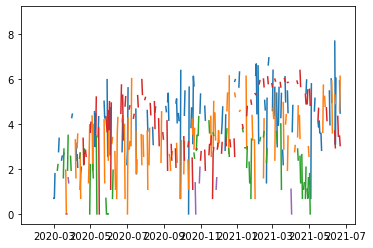

In [48]:
plt.plot(x)

In [49]:
split=round(len(x)/2)
x1,x2=x[0:split],x[split:]
mean1,mean2=x1.mean(),x2.mean()
print(mean1,mean2)
var1,var2=x1.var(), x2.var()
print(var1,var2)

United Arab Emirates   -inf
Congo (Kinshasa)       -inf
San Marino             -inf
Gabon                  -inf
Dominica               -inf
dtype: float64 United Arab Emirates   -inf
Congo (Kinshasa)       -inf
San Marino             -inf
Gabon                  -inf
Dominica               -inf
dtype: float64
United Arab Emirates   NaN
Congo (Kinshasa)       NaN
San Marino             NaN
Gabon                  NaN
Dominica               NaN
dtype: float64 United Arab Emirates   NaN
Congo (Kinshasa)       NaN
San Marino             NaN
Gabon                  NaN
Dominica               NaN
dtype: float64


In [50]:


seed(1)

for i in x:
    stat, p = shapiro(x[i])
    alpha = 0.05
    if p > alpha:
        print(i)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('p-value > 0.05, Sample looks Gaussian (fail to reject H0)')
        print('')
    else:
        print(i)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('p-value < 0.05, Sample does not look Gaussian (reject H0)')
        print('')

United Arab Emirates
Statistics=nan, p=1.000
p-value > 0.05, Sample looks Gaussian (fail to reject H0)

Congo (Kinshasa)
Statistics=nan, p=1.000
p-value > 0.05, Sample looks Gaussian (fail to reject H0)

San Marino
Statistics=nan, p=1.000
p-value > 0.05, Sample looks Gaussian (fail to reject H0)

Gabon
Statistics=nan, p=1.000
p-value > 0.05, Sample looks Gaussian (fail to reject H0)

Dominica
Statistics=nan, p=1.000
p-value > 0.05, Sample looks Gaussian (fail to reject H0)



-----

### 5. Seasonalty analysis

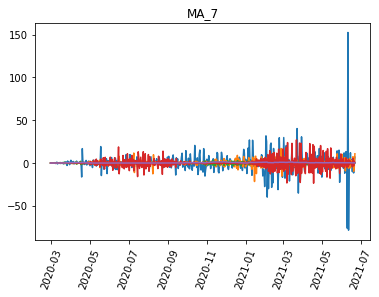

In [52]:
degrees = 70

ma_7 = global_cases.rolling(window=7).mean()
plt.plot(ma_30)
plt.title('MA_7')
plt.xticks(rotation=degrees)
plt.show()


In [55]:
global_cases

,United Arab Emirates,Congo (Kinshasa),San Marino,Gabon,Dominica
Date,,,,,
2020-01-31,4.0,0.0,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0,0.0,0.0
2020-02-03,-2.0,0.0,0.0,0.0,0.0
2020-02-04,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-06-18,-381.0,-29.0,0.0,77.0,0.0
2021-06-19,392.0,160.0,0.0,32.0,0.0
2021-06-20,-426.0,-455.0,0.0,-64.0,0.0


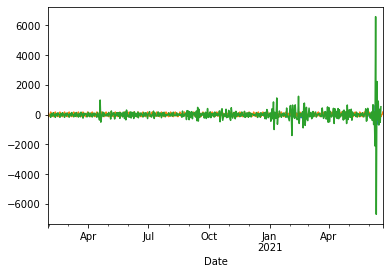

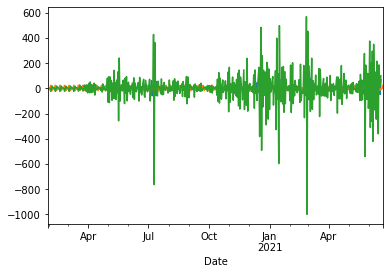

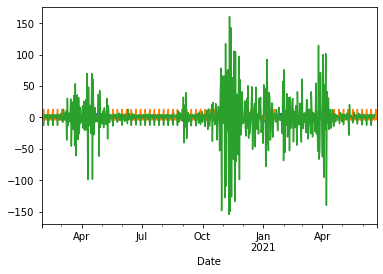

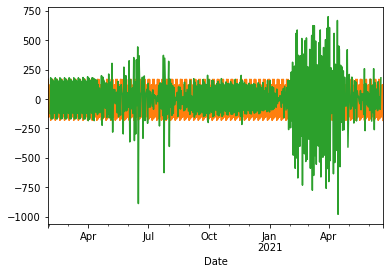

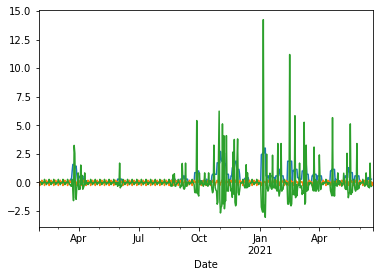

In [66]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Iterate
for col in global_cases.columns:
    # Decompose the time series into its trend, seasonal, and residual components
    result = sm.tsa.seasonal_decompose(global_cases[col])
    
    # Extract the trend, seasonal, and residual components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid
    trend.plot()
    seasonal.plot()
    residual.plot()
    
    # Show the plot
    plt.show()
    
    


-----

### 6 Autocorelation

United Arab Emirates


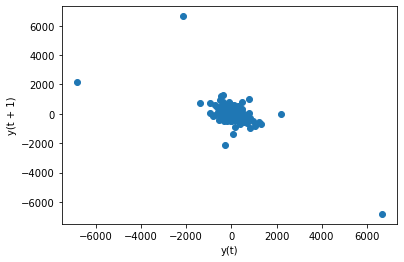

Congo (Kinshasa)


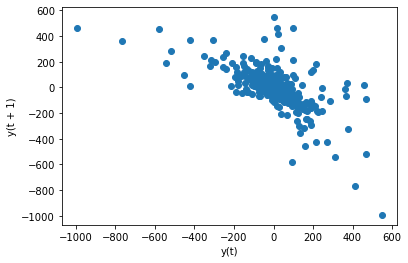

San Marino


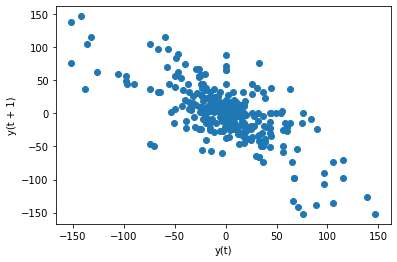

Gabon


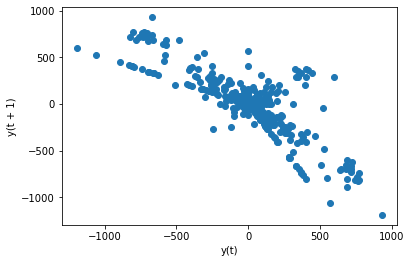

Dominica


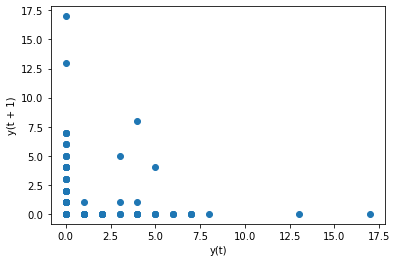

In [69]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

for i in global_cases:
    lag_plot(global_cases[i])
    print(i)
    pyplot.show()

United Arab Emirates


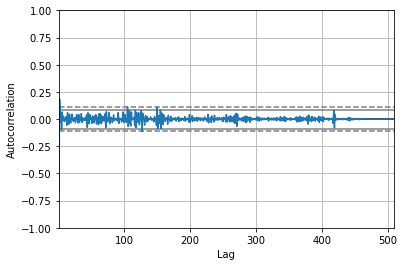

Congo (Kinshasa)


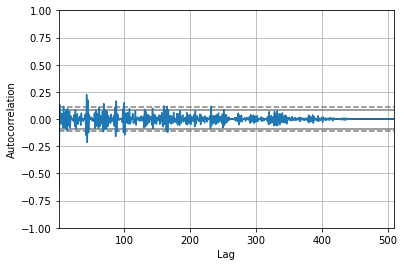

San Marino


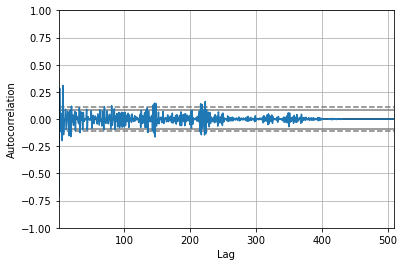

Gabon


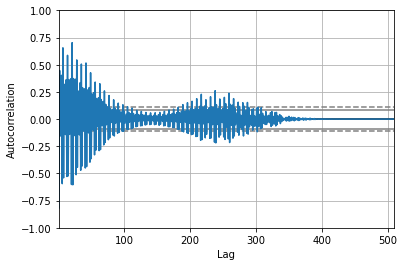

Dominica


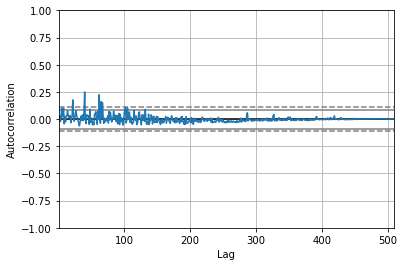

In [71]:
from pandas.plotting import autocorrelation_plot

for i in global_cases:
    autocorrelation_plot(global_cases[i])
    print(i)
    pyplot.show()

**ACF**

United Arab Emirates


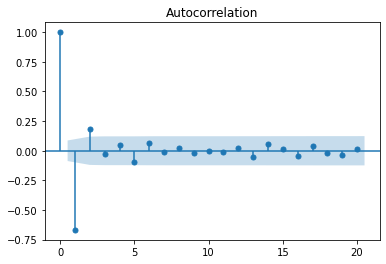

Congo (Kinshasa)


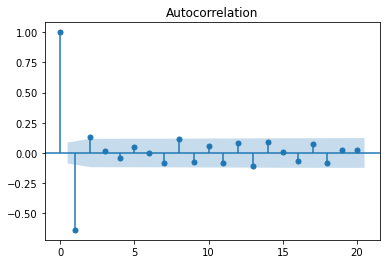

San Marino


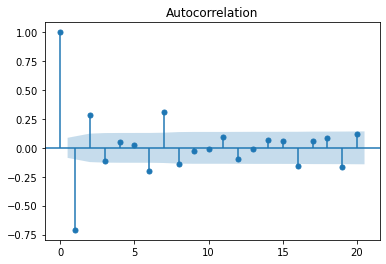

Gabon


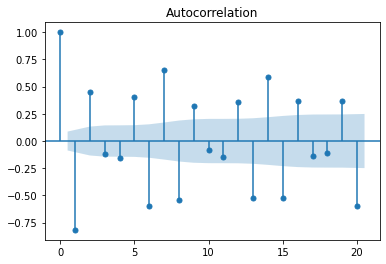

Dominica


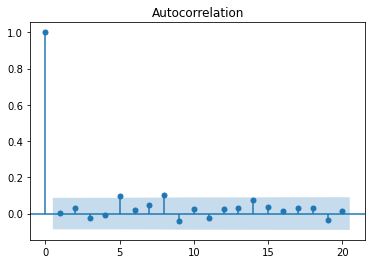

In [72]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

for i in global_cases:
    plot_acf(global_cases[i], lags = 20)
    print(i)
    plt.show()

**PACF**



C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


United Arab Emirates


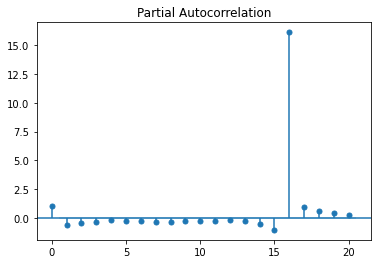

Congo (Kinshasa)


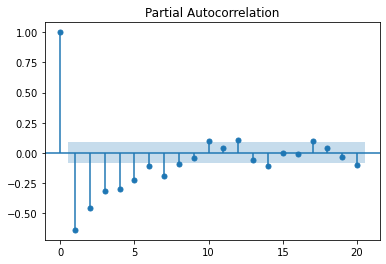

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


San Marino


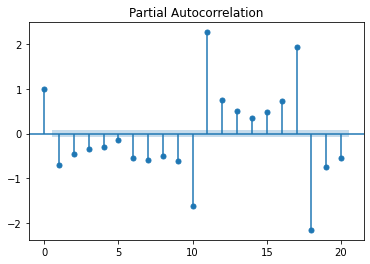

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Gabon


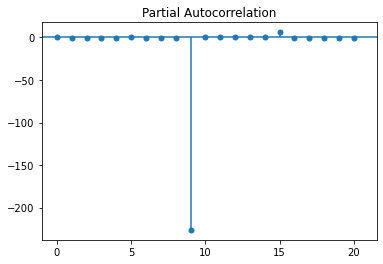

Dominica


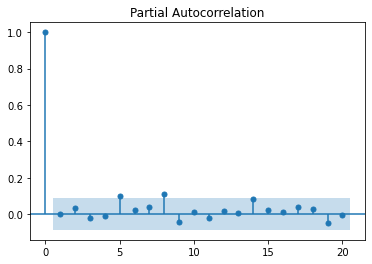

In [73]:
for i in global_cases:
    plot_pacf(global_cases[i], lags = 20)
    print(i)
    plt.show()

**Conclusion** : Comme nous pouvons le voir dans l'ACF et le PACF, il n'y a pas de tendance vers un modèle spécifique MA ou AR.
Par conséquent, nous pouvons conclure qu'un modèle ARMA, avec prise en compte de la saisonnalité hebdomadaire, sera le plus approprié.

-----

###  8. SARIMAX

In [ ]:
#!pip install pmdarima

In [74]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ndiffs

for i in global_cases:   
    
    # Splitting 
    train_size = 0.8
    split_idx = round(len(global_cases[i])* train_size)
    y_train = global_cases[i].iloc[:split_idx]
    y_test = global_cases[i].iloc[split_idx:]

    # Détermination des différences
    kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
    adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
    n_diffs = max(adf_diffs, kpss_diffs)
    
    # Détermination des p et q
    auto = auto_arima(y_train, d=n_diffs, seasonal=True, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)
    
    print("")
    print(i)
    print(auto.order)
    print('')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5638.510, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5569.609, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5636.511, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5501.205, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5480.715, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=5463.931, Time=0.09 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=5429.581, Time=0.10 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=5351.978, Time=0.33 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=5269.211, Time=0.94 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=5291.673, Time=1.23 sec
 ARIMA(6,0,2)(0,0,0)[0] intercept   : AIC=5274.202, Time=1.52 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=5275.967, Time=1.53 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=5

-----

### 9. Fitting du Modèle

**Split - Train test**

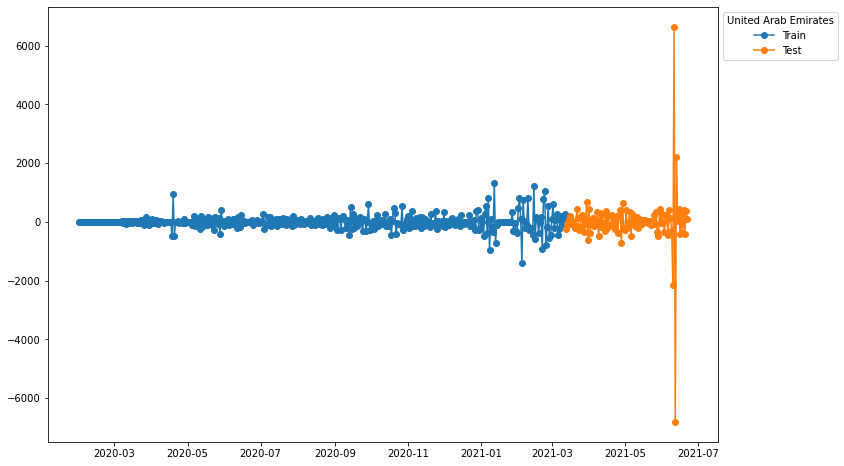

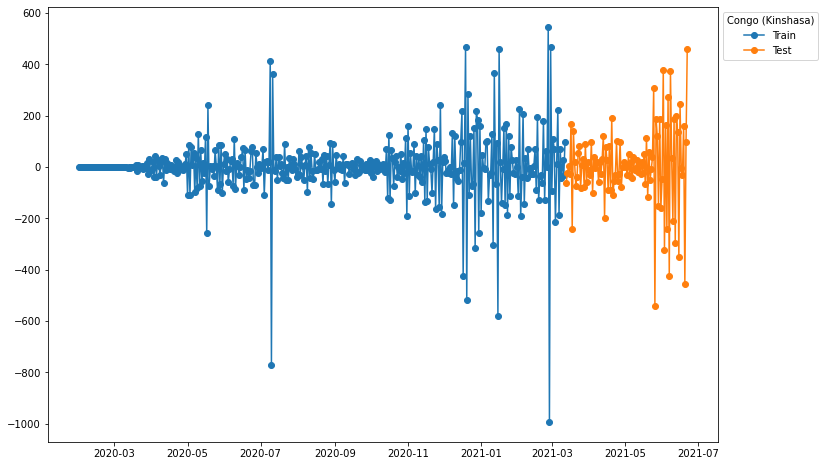

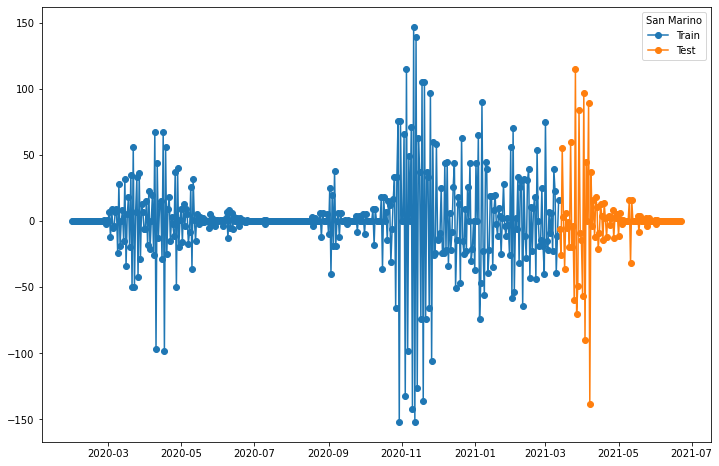

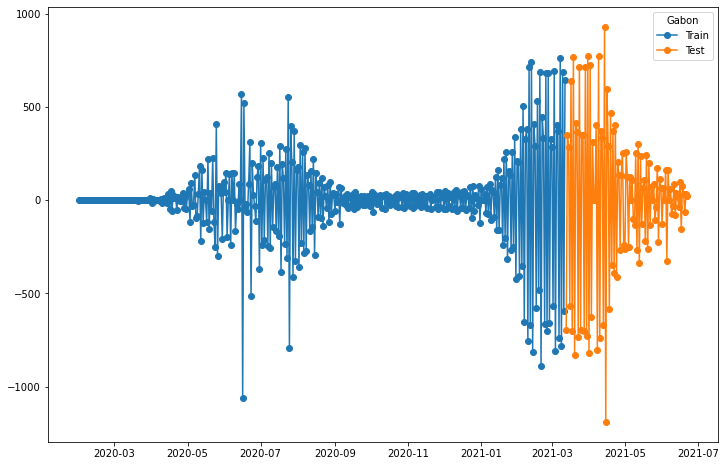

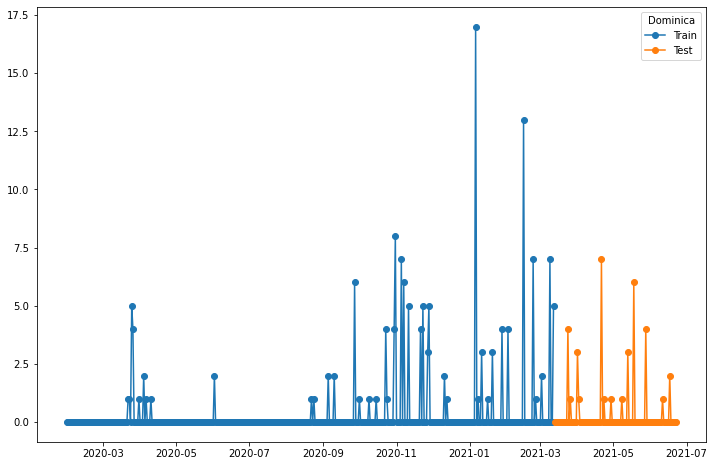

In [75]:
for i in global_cases:

# Train Test Split Index
    train_size = 0.8
    split_idx = round(len(global_cases[i])* train_size)
    split_idx

# Split
    train = global_cases[i].iloc[:split_idx]
    test = global_cases[i].iloc[split_idx:]

# Visualize split
    fig,ax= plt.subplots(figsize=(12,8))
    kws = dict(marker='o')
    plt.plot(train, label='Train', **kws)
    plt.plot(test, label='Test', **kws)
    ax.legend(bbox_to_anchor=[1,1], title = i)

**Fit SARIMAX**

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [77]:
time_series


0    [4.0, 0.0, 1.0, -2.0, 1.0, 0.0, 0.0, 0.0, 2.0,...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
dtype: object

In [83]:
time_series.isnull().sum()

0

In [81]:
data=np.asarray(time_series)

In [97]:
import statsmodels.api as sm

# Iterate through all the lists in data
for time_series in data:
    # Convert the time series data to a NumPy array
    time_series_data = np.asarray(time_series)

    # Fit a SARIMA(1, 1, 1)x(0, 1, 1, 12) model to the time series
    model = sm.tsa.statespace.SARIMAX(endog=time_series_data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
    results = model.fit()

    # Print the model summary
    print(results.summary())



C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  509
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3672.491
Date:                            Fri, 30 Dec 2022   AIC                           7352.982
Time:                                    17:19:03   BIC                           7369.808
Sample:                                         0   HQIC                          7359.587
                                            - 509                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6673      0.007   -102.466      0.000      -0.680      -0.655
ma.L1         -1.0000      0.011   

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  509
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3009.318
Date:                            Fri, 30 Dec 2022   AIC                           6026.635
Time:                                    17:19:09   BIC                           6043.462
Sample:                                         0   HQIC                          6033.240
                                            - 509                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6557      0.021    -30.922      0.000      -0.697      -0.614
ma.L1         -0.9999      2.688   

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  509
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2301.650
Date:                            Fri, 30 Dec 2022   AIC                           4611.301
Time:                                    17:19:17   BIC                           4628.127
Sample:                                         0   HQIC                          4617.906
                                            - 509                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7021      0.021    -32.924      0.000      -0.744      -0.660
ma.L1         -0.9997      2.059   

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  509
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -3253.387
Date:                            Fri, 30 Dec 2022   AIC                           6514.775
Time:                                    17:19:24   BIC                           6531.601
Sample:                                         0   HQIC                          6521.379
                                            - 509                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8194      0.021    -39.375      0.000      -0.860      -0.779
ma.L1         -0.9999      7.943   

**Plot diagnostics**

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


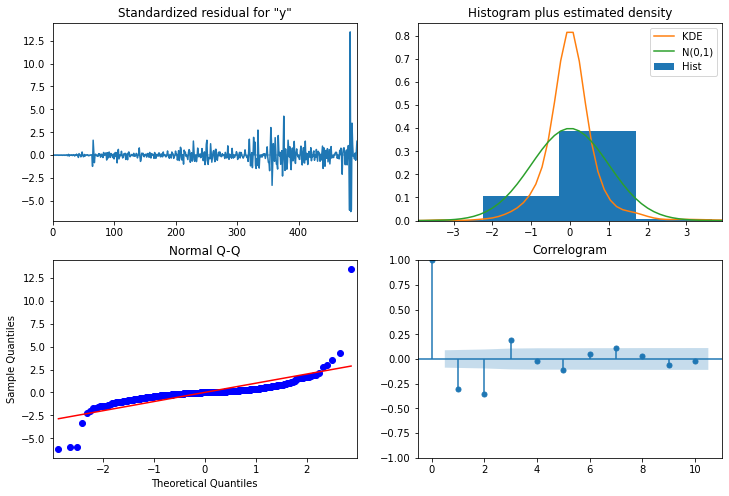

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


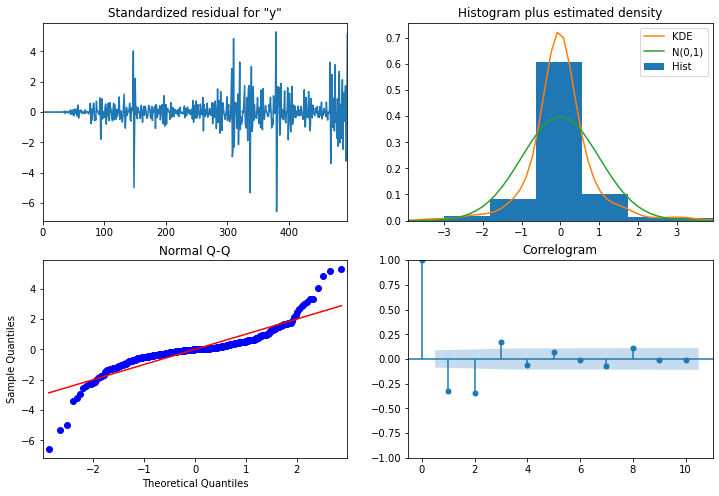

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


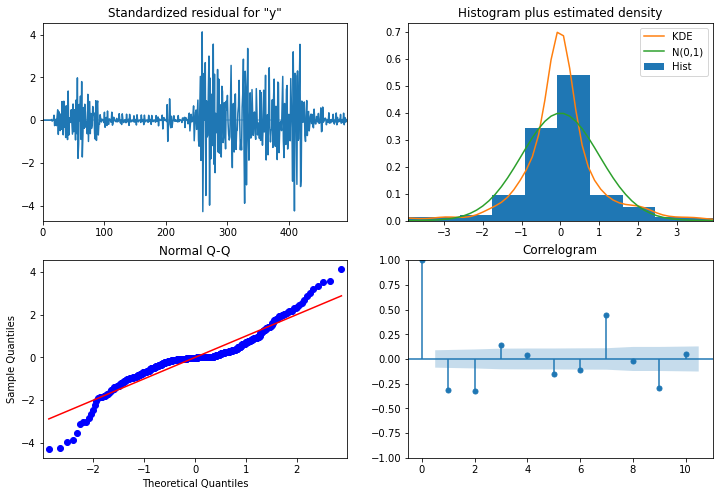

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


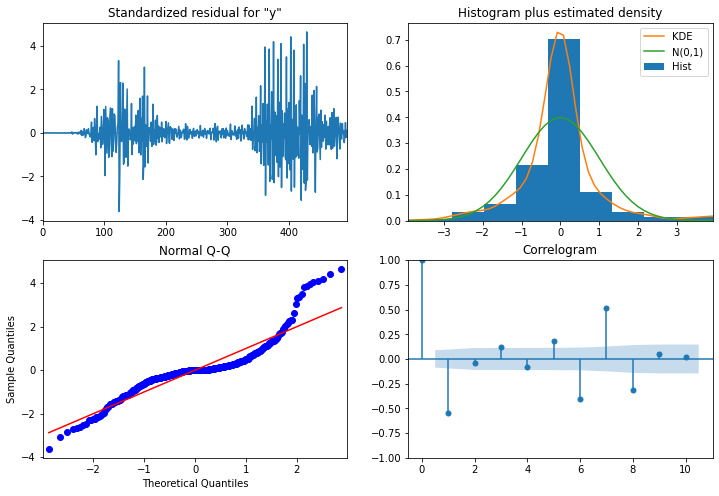

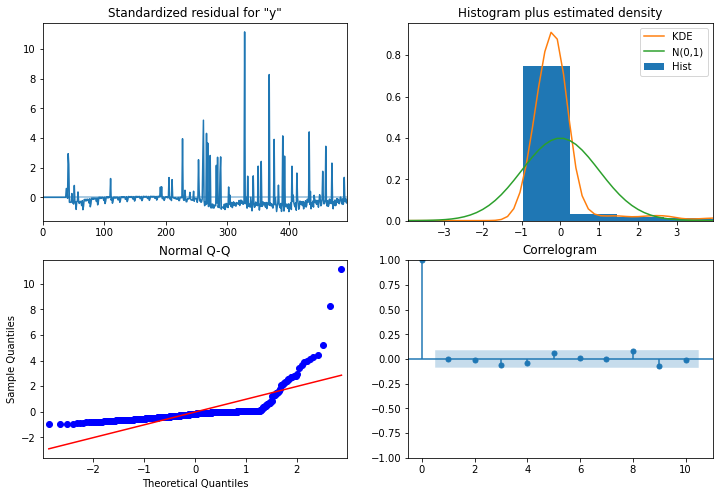

In [101]:
import matplotlib.pyplot as plt

# Iterate through all the lists in data
for time_series in data:
    # Convert the time series data to a NumPy array
    time_series_data = np.asarray(time_series)

    # Fit a SARIMA(1, 1, 1)x(0, 1, 1, 12) model to the time series
    model = sm.tsa.statespace.SARIMAX(endog=time_series_data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
    results = model.fit()

    # Plot the model diagnostics
    results.plot_diagnostics(figsize=(12, 8))
    plt.show()



-----